В вашем распоряжении данные о поведении пользователей сотовой компании. Руководство хочет понять, какой тариф приносит больший доход компании.

Описание данных:

   * history.csv - посуточные данные о действиях пользователь
        * date - дата
        * user_id - id пользователя
        * tariff - Название тарифа
        * gb - количество израсходованных Гб за сутки
        * min - количество израсходованных минут за сутки
        * sms - количество израсходованных смс за сутки
        * count_calls - количество звонков за сутки
   * tariffs.csv - Информация о тарифных планах
        * tariff - название тарифа
        * min - количество минут в пакете
        * gb - количество Гб в пакете
        * sms - количество смс в пакете
        * price - стоимость пакета
        * price_1min - стоимость 1 минуты при привышении количества минут пакета
        * price_1gb	- стоимость 1 Гб при привышении количества Гб пакета 
        * price_1sms - стоимость 1 смс при привышении количества смс пакета 

1. Подготовьте данные
    * Приведите данные к нужным типам;
    * Найдите и исправьте ошибки в данных, если они есть.
2. Посчитайте для каждого пользователя:
    * количество сделанных звонков и израсходованных минут разговора по месяцам;
    * количество отправленных сообщений по месяцам;
    * объем израсходованного интернет-трафика по месяцам;
    * помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
3. Проанализируйте данные
    * Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.
4. Проверьте гипотезы:
    * средняя выручка пользователей тарифов «VIP», «Стандартный» различаются
    * средняя выручка пользователей тарифа «Премиум» больше чем средняя выручка пользователей тарифа «VIP»
        - Пороговое значение alpha задайте самостоятельно
5. Поясните:
    * как вы формулировали нулевую и альтернативную гипотезы;
    * какой критерий использовали для проверки гипотез и почему.
6. Сделайте финальные выводы

# Подготовка данных

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import pandas as pd
from datetime import datetime
from scipy import stats as st

In [3]:
history = pd.read_csv('history.csv', encoding='cp1251', index_col=0)
history.head(5)

,date,user_id,tariff,gb,min,sms,count_calls
0,23/02/2018,100602,Стандартный,2.18,1.0,2.0,1
1,23/03/2018,102494,Стандартный,4.23,4.0,2.0,1
2,30/07/2018,101593,Стандартный,4.91,7.0,2.0,2
3,27/02/2018,102541,Стандартный,1.60,9.0,2.0,2
4,01/08/2018,101477,Стандартный,1.63,8.0,2.0,2


In [4]:
tariffs = pd.read_csv('tariffs.csv', encoding='cp1251', index_col=0)
tariffs.head(5)

,tariff,min,gb,sms,price,price_1min,price_1gb,price_1sms
0,Стандартный,250,5,50,300,2.0,100,5
1,VIP,1500,50,200,900,1.6,100,5
2,Премиум,3000,70,500,2000,1.5,100,5


**Преобразование столбца дат к типу datetime64**

In [5]:
history['date'] = pd.to_datetime(history.date, format='%d/%m/%Y')

In [6]:
history['month'] = history['date'].dt.strftime('%b')
history

,date,user_id,tariff,gb,min,sms,count_calls,month
0,2018-02-23,100602,Стандартный,2.18,1.0,2.0,1,Feb
1,2018-03-23,102494,Стандартный,4.23,4.0,2.0,1,Mar
2,2018-07-30,101593,Стандартный,4.91,7.0,2.0,2,Jul
3,2018-02-27,102541,Стандартный,1.60,9.0,2.0,2,Feb
4,2018-08-01,101477,Стандартный,1.63,8.0,2.0,2,Aug
...,...,...,...,...,...,...,...,...
847995,2018-08-02,103645,Стандартный,2.90,20.0,2.0,3,Aug
847996,2018-05-17,102919,VIP,1.34,66.0,2.0,4,May
847997,2018-03-12,102068,Стандартный,2.47,10.0,1.0,2,Mar
847998,2018-06-08,102196,Стандартный,1.10,6.0,3.0,2,Jun


In [7]:
month_ear = pd.merge(history,tariffs,on="tariff",how="left")
month_ear

,date,user_id,tariff,gb_x,min_x,sms_x,count_calls,month,min_y,gb_y,sms_y,price,price_1min,price_1gb,price_1sms
0,2018-02-23,100602,Стандартный,2.18,1.0,2.0,1,Feb,250,5,50,300,2.0,100,5
1,2018-03-23,102494,Стандартный,4.23,4.0,2.0,1,Mar,250,5,50,300,2.0,100,5
2,2018-07-30,101593,Стандартный,4.91,7.0,2.0,2,Jul,250,5,50,300,2.0,100,5
3,2018-02-27,102541,Стандартный,1.60,9.0,2.0,2,Feb,250,5,50,300,2.0,100,5
4,2018-08-01,101477,Стандартный,1.63,8.0,2.0,2,Aug,250,5,50,300,2.0,100,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847995,2018-08-02,103645,Стандартный,2.90,20.0,2.0,3,Aug,250,5,50,300,2.0,100,5
847996,2018-05-17,102919,VIP,1.34,66.0,2.0,4,May,1500,50,200,900,1.6,100,5
847997,2018-03-12,102068,Стандартный,2.47,10.0,1.0,2,Mar,250,5,50,300,2.0,100,5
847998,2018-06-08,102196,Стандартный,1.10,6.0,3.0,2,Jun,250,5,50,300,2.0,100,5


In [8]:
month_ear = month_ear.rename(columns={'gb_x': 'gb_sum', 'min_x': 'min_sum', 'sms_x' : 'sms_sum', 'min_y': 'min', 'gb_y': 'gb', 'sms_y' : 'sms'})

# Посчитайте для каждого пользователя: 

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [9]:
arr = {'gb_sum': ['sum'], 'min_sum': ['sum'], 'sms_sum': ['sum'], 'count_calls' : ['sum'], 'tariff' : ['first'],
'min' : ['first'], 'gb' : ['first'], 'sms' : ['first'], 'price_1min' : ['first'], 
'price_1sms' : ['first'],'price_1gb' : ['first'],'price' : ['first'], 'date' : ['first']}
month_ear = month_ear.groupby(['month','user_id'], as_index=False).agg(arr)

In [10]:
month_ear

,month,user_id,gb_sum,min_sum,sms_sum,count_calls,tariff,min,gb,sms,price_1min,price_1sms,price_1gb,price,date
,,,sum,sum,sum,sum,first,first,first,first,first,first,first,first,first
0,Apr,100000,51.28,1365.0,47.0,110,VIP,1500,50,200,1.6,5,100,900,2018-04-03
1,Apr,100001,72.88,2820.0,522.0,125,Премиум,3000,70,500,1.5,5,100,2000,2018-04-25
2,Apr,100002,95.88,246.0,61.0,54,Стандартный,250,5,50,2.0,5,100,300,2018-04-19
3,Apr,100003,95.21,223.0,63.0,53,Стандартный,250,5,50,2.0,5,100,300,2018-04-26
4,Apr,100004,108.01,258.0,63.0,62,Стандартный,250,5,50,2.0,5,100,300,2018-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,May,103995,51.29,1828.0,44.0,123,VIP,1500,50,200,1.6,5,100,900,2018-05-24
27996,May,103996,65.15,1541.0,48.0,118,VIP,1500,50,200,1.6,5,100,900,2018-05-15
27997,May,103997,95.32,294.0,61.0,66,Стандартный,250,5,50,2.0,5,100,300,2018-05-28


In [11]:
def calc_price(sum,tariff_count,price_for_tariff,price_for_one):
    if sum <= tariff_count:
        return price_for_tariff
    return price_for_tariff + (sum - tariff_count) * price_for_one

In [12]:
month_ear['sms_price'] = month_ear.apply(lambda x: calc_price(x['sms_sum']['sum'],x['sms']['first'],x['price']['first'],x['price_1sms']['first']), axis=1)
month_ear['gb_price'] = month_ear.apply(lambda x: calc_price(x['gb_sum']['sum'],x['gb']['first'],x['price']['first'],x['price_1gb']['first']), axis=1)
month_ear['min_price'] = month_ear.apply(lambda x: calc_price(x['min_sum']['sum'],x['min']['first'],x['price']['first'],x['price_1min']['first']), axis=1)

In [13]:
month_ear['result_price'] = month_ear['sms_price'] + month_ear['gb_price'] + month_ear['min_price']

In [14]:
month_ear

,month,user_id,gb_sum,min_sum,sms_sum,count_calls,tariff,min,gb,sms,price_1min,price_1sms,price_1gb,price,date,sms_price,gb_price,min_price,result_price
,,,sum,sum,sum,sum,first,first,first,first,first,first,first,first,first,,,,
0,Apr,100000,51.28,1365.0,47.0,110,VIP,1500,50,200,1.6,5,100,900,2018-04-03,900.0,1028.0,900.0,2828.0
1,Apr,100001,72.88,2820.0,522.0,125,Премиум,3000,70,500,1.5,5,100,2000,2018-04-25,2110.0,2288.0,2000.0,6398.0
2,Apr,100002,95.88,246.0,61.0,54,Стандартный,250,5,50,2.0,5,100,300,2018-04-19,355.0,9388.0,300.0,10043.0
3,Apr,100003,95.21,223.0,63.0,53,Стандартный,250,5,50,2.0,5,100,300,2018-04-26,365.0,9321.0,300.0,9986.0
4,Apr,100004,108.01,258.0,63.0,62,Стандартный,250,5,50,2.0,5,100,300,2018-04-24,365.0,10601.0,316.0,11282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,May,103995,51.29,1828.0,44.0,123,VIP,1500,50,200,1.6,5,100,900,2018-05-24,900.0,1029.0,1424.8,3353.8
27996,May,103996,65.15,1541.0,48.0,118,VIP,1500,50,200,1.6,5,100,900,2018-05-15,900.0,2415.0,965.6,4280.6
27997,May,103997,95.32,294.0,61.0,66,Стандартный,250,5,50,2.0,5,100,300,2018-05-28,355.0,9332.0,388.0,10075.0


# Анализ данных

In [15]:
vip = month_ear.loc[month_ear['tariff']['first'] == 'VIP']
standart = month_ear.loc[month_ear['tariff']['first'] == 'Стандартный']
premium = month_ear.loc[month_ear['tariff']['first'] == 'Премиум']

## Тариф VIP

In [16]:
vip_sms_sum_np = np.array(vip['sms_sum']['sum'])
print("========================СМС========================")
print("Мат. ожидание смс тарифа VIP: ", vip_sms_sum_np.mean())
print("СКО количества смс тарифа VIP: ", vip_sms_sum_np.std())
print("Дисперсия количества смс тарифа VIP: ", pow(vip_sms_sum_np.std(), 2))
vip_gb_sum_np = np.array(vip['gb_sum']['sum'])
print("======================Траффик======================")
print("Мат. ожидание гб тарифа VIP: ", vip_gb_sum_np.mean())
print("СКО количества гб тарифа VIP: ", vip_gb_sum_np.std())
print("Дисперсия количества гб тарифа VIP: ", pow(vip_gb_sum_np.std(), 2))
vip_min_sum_np = np.array(vip['min_sum']['sum'])
print("======================Минуты=======================")
print("Мат. ожидание минут тарифа VIP: ", vip_min_sum_np.mean())
print("СКО количества минут тарифа VIP: ", vip_min_sum_np.std())
print("Дисперсия количества минут тарифа VIP: ", pow(vip_min_sum_np.std(), 2))

========================СМС========================
Мат. ожидание смс тарифа VIP:  45.428202923473776
СКО количества смс тарифа VIP:  3.2123641153406575
Дисперсия количества смс тарифа VIP:  10.319283209528365
======================Траффик======================
Мат. ожидание гб тарифа VIP:  52.517067927773
СКО количества гб тарифа VIP:  6.438337941132403
Дисперсия количества гб тарифа VIP:  41.452195444225026
======================Минуты=======================
Мат. ожидание минут тарифа VIP:  1518.8828153789461
СКО количества минут тарифа VIP:  120.51497829461334
Дисперсия количества минут тарифа VIP:  14523.859993351125


## Тариф Стандарт

In [17]:
standart_sms_sum_np = np.array(standart['sms_sum']['sum'])
print("========================СМС========================")
print("Мат. ожидание смс тарифа Стандарт: ", standart_sms_sum_np.mean())
print("СКО количества смс тарифа Стандарт: ", standart_sms_sum_np.std())
print("Дисперсия количества смс тарифа Стандарт: ", pow(standart_sms_sum_np.std(), 2))
standart_gb_sum_np = np.array(standart['gb_sum']['sum'])
print("======================Траффик======================")
print("Мат. ожидание гб тарифа Стандарт: ", standart_gb_sum_np.mean())
print("СКО количества гб тарифа Стандарт: ", standart_gb_sum_np.std())
print("Дисперсия количества гб тарифа Стандарт: ", pow(standart_gb_sum_np.std(), 2))
standart_min_sum_np = np.array(standart['min_sum']['sum'])
print("======================Минуты=======================")
print("Мат. ожидание минут тарифа Стандарт: ", standart_min_sum_np.mean())
print("СКО количества минут тарифа Стандарт: ", standart_min_sum_np.std())
print("Дисперсия количества минут тарифа Стандарт: ", pow(standart_min_sum_np.std(), 2))

========================СМС========================
Мат. ожидание смс тарифа Стандарт:  60.58142493638677
СКО количества смс тарифа Стандарт:  3.7644432055557817
Дисперсия количества смс тарифа Стандарт:  14.171032647855089
======================Траффик======================
Мат. ожидание гб тарифа Стандарт:  92.00270992366411
СКО количества гб тарифа Стандарт:  8.9834192334962
Дисперсия количества гб тарифа Стандарт:  80.70182112474944
======================Минуты=======================
Мат. ожидание минут тарифа Стандарт:  276.6699987883194
СКО количества минут тарифа Стандарт:  27.744554389634953
Дисперсия количества минут тарифа Стандарт:  769.7602982794122


## Тариф Премиум

In [18]:
premium_sms_sum_np = np.array(premium['sms_sum']['sum'])
print("========================СМС========================")
print("Мат. ожидание смс тарифа Премиум: ", premium_sms_sum_np.mean())
print("СКО количества смс тарифа Премиум: ", premium_sms_sum_np.std())
print("Дисперсия количества смс тарифа Премиум: ", pow(premium_sms_sum_np.std(), 2))
premium_gb_sum_np = np.array(premium['gb_sum']['sum'])
print("======================Траффик======================")
print("Мат. ожидание гб тарифа Премиум: ", premium_gb_sum_np.mean())
print("СКО количества гб тарифа Премиум: ", premium_gb_sum_np.std())
print("Дисперсия количества гб тарифа Премиум: ", pow(premium_gb_sum_np.std(), 2))
premium_min_sum_np = np.array(premium['min_sum']['sum'])
print("======================Минуты=======================")
print("Мат. ожидание минут тарифа Премиум: ", premium_min_sum_np.mean())
print("СКО количества минут тарифа Премиум: ", premium_min_sum_np.std())
print("Дисперсия количества минут тарифа Премиум: ", pow(premium_min_sum_np.std(), 2))

========================СМС========================
Мат. ожидание смс тарифа Премиум:  506.0733671339099
СКО количества смс тарифа Премиум:  45.46231336043767
Дисперсия количества смс тарифа Премиум:  2066.8219360826292
======================Траффик======================
Мат. ожидание гб тарифа Премиум:  74.63041455413062
СКО количества гб тарифа Премиум:  8.926610374478225
Дисперсия количества гб тарифа Премиум:  79.68437277774227
======================Минуты=======================
Мат. ожидание минут тарифа Премиум:  3019.0483149418433
СКО количества минут тарифа Премиум:  282.9787330666785
Дисперсия количества минут тарифа Премиум:  80076.96336802248


## Построение графиков 

### Для СМС

Text(0.5, 0, 'sms')

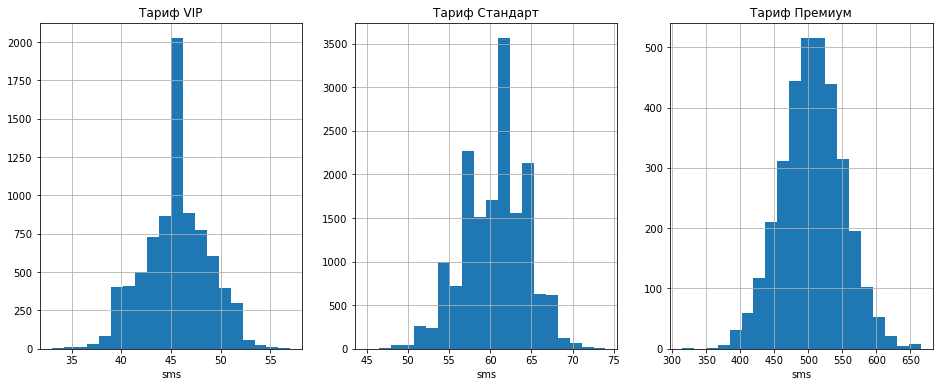

In [19]:
plt.figure(figsize=(16,6))
plt.subplot(131)
h = pd.Series(vip_sms_sum_np).hist(bins=20)
fig = h.get_figure()
plt.title('Тариф VIP')
plt.xlabel('sms')

plt.subplot(132)
h = pd.Series(standart_sms_sum_np).hist(bins=20)
fig = h.get_figure()
plt.title('Тариф Стандарт')
plt.xlabel('sms')

plt.subplot(133)
h = pd.Series(premium_sms_sum_np).hist(bins=20)
fig = h.get_figure()
plt.title('Тариф Премиум')
plt.xlabel('sms')

### Для траффика

Text(0.5, 0, 'gb')

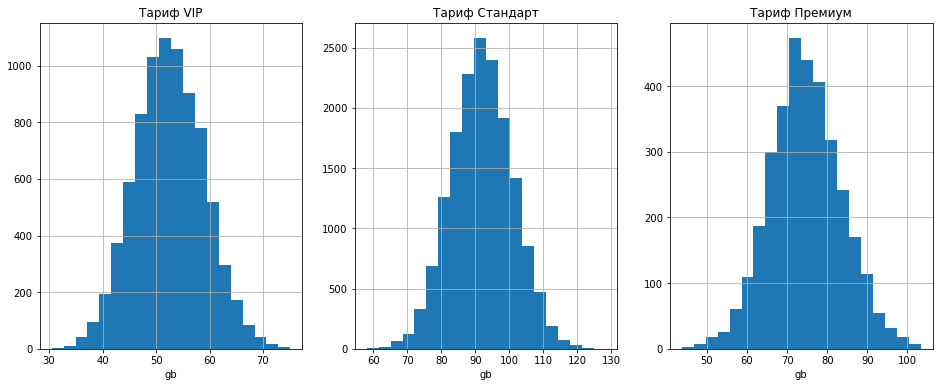

In [20]:
plt.figure(figsize=(16,6))
plt.subplot(131)
h = pd.Series(vip_gb_sum_np).hist(bins=20)
fig = h.get_figure()
plt.title('Тариф VIP')
plt.xlabel('gb')

plt.subplot(132)
h = pd.Series(standart_gb_sum_np).hist(bins=20)
fig = h.get_figure()
plt.title('Тариф Стандарт')
plt.xlabel('gb')

plt.subplot(133)
h = pd.Series(premium_gb_sum_np).hist(bins=20)
fig = h.get_figure()
plt.title('Тариф Премиум')
plt.xlabel('gb')

### Для минут

Text(0.5, 0, 'min')

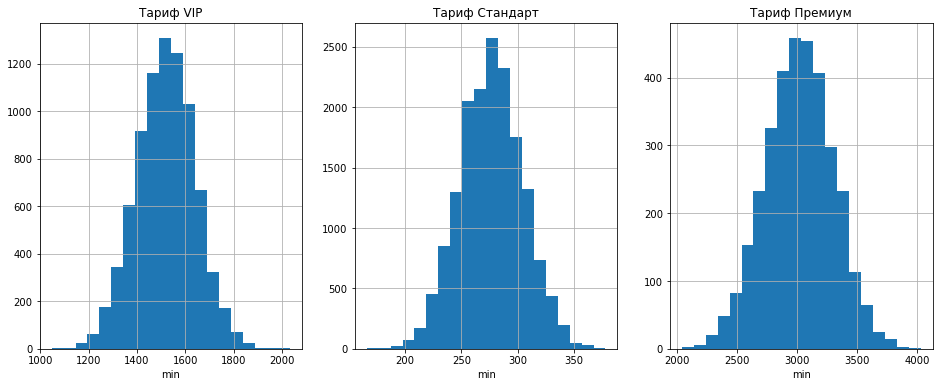

In [22]:
plt.figure(figsize=(16,6))
plt.subplot(131)
h = pd.Series(vip_min_sum_np).hist(bins=20)
fig = h.get_figure()
plt.title('Тариф VIP')
plt.xlabel('min')

plt.subplot(132)
h = pd.Series(standart_min_sum_np).hist(bins=20)
fig = h.get_figure()
plt.title('Тариф Стандарт')
plt.xlabel('min')

plt.subplot(133)
h = pd.Series(premium_min_sum_np).hist(bins=20)
fig = h.get_figure()
plt.title('Тариф Премиум')
plt.xlabel('min')

Text(0.5, 0, 'price')

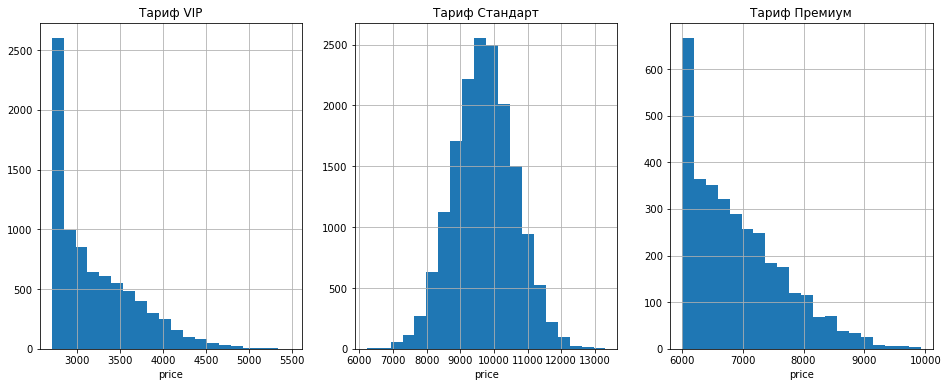

In [23]:
plt.figure(figsize=(16,6))
plt.subplot(131)
h = pd.Series(vip['result_price']).hist(bins=20)
fig = h.get_figure()
plt.title('Тариф VIP')
plt.xlabel('price')

plt.subplot(132)
h = pd.Series(standart['result_price']).hist(bins=20)
fig = h.get_figure()
plt.title('Тариф Стандарт')
plt.xlabel('price')

plt.subplot(133)
h = pd.Series(premium['result_price']).hist(bins=20)
fig = h.get_figure()
plt.title('Тариф Премиум')
plt.xlabel('price')

#### Вывод: распределния близки по виду к нормальному, при проверке гипотез воспользуемся t - критерием Стьюдента

# Проверка гипотез

In [24]:
alpha = .05

results = st.ttest_ind(np.array(vip['result_price']), np.array(standart['result_price']))

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средняя выручка пользователей тарифов «VIP», «Стандартный» разная")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Cредняя выручка пользователей тарифов «VIP», «Стандартный» одинаковая")

p-значение: 0.0
Отвергаем нулевую гипотезу. Средняя выручка пользователей тарифов «VIP», «Стандартный» разная


In [31]:
t_vip = vip['result_price']
t_premium = premium['result_price']

In [34]:
# данные контрольной группы A
samples_A = t_vip

# данные экспериментальной группы B
samples_B = t_premium

AB_difference = samples_B.mean() - samples_A.mean() 
print("Разность выручек:", AB_difference)

alpha = 0.05
    
state = np.random.RandomState(12345)

bootstrap_samples = 1000
count = 0
for i in range(bootstrap_samples):
    # объединяем выборки
    united_samples = pd.concat([samples_A,samples_B])

    # создаем подвыборку
    subsample = united_samples.sample(frac=1, replace=True, random_state=state)
    
    # разбиение выборки пополам
    subsample_A = subsample[:len(samples_A)]
    subsample_B = subsample[len(samples_A):] 

    # находим разницу средних
    bootstrap_difference = subsample_B.mean() - subsample_A.mean() 
    
    # если разница не меньше фактической, увеличиваем счётчик
    if bootstrap_difference >= AB_difference:
        count += 1

# p-value равно доле превышений значений
pvalue = 1. * count / bootstrap_samples
print('p-value =', pvalue)

if pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средняя выручка пользователей тарифа" + 
          "\n«Премиум» больше чем средняя выручка пользователей тарифа «VIP» ")
else:
    print("Выручки по тарифу 'VIP' и 'Премиум равны'")

Разность выручек: 3726.2381830518902
p-value = 0.0
Отвергаем нулевую гипотезу: средняя выручка пользователей тарифа
«Премиум» больше чем средняя выручка пользователей тарифа «VIP» 


#### Вывод: В обоих случиях мы отвергли 0 гипотезу. В первом случае у нас средняя выручка пользователей тарифов «VIP» и «Стандартный» разная, а во втором средняя выручка пользователей тарифа «Премиум» больше чем средняя выручка пользователей тарифа «VIP».

# Выводы

* В ходе исследования тарифов мы получили, что самую высокую выручку приносит Стандартный тариф. Происходит это потому, что им всегда приходится доплачивать за недостающие гб, минуты и смс. С тарифа "VIP" самая маленькая выручка, так как они почти всегда не выходят за нормы тарифа.
* Для проверки гипотез мы использовали t-критерий Стьюдента. В обоих случаях получили, что p-value = 0, а это значит, что невозможно получить условие, когда средняя выручка по разным группам одинакова. Поэтому нулевая гипотеза была отвергнута в обоих случиях.